Loading the NBCData

In [8]:
import pandas as pd
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\NBCData.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


Import necessary libraries & Packages

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Define Features & Target Variables

In [10]:
# Define features (X) and target variable (y)
X = df[['glucose', 'bloodpressure']]
y = df['diabetes']

Defining number of Bootstrap Samples

In [11]:
# Number of bootstrap samples
n_bootstrap_samples = 200

In [12]:
# Lists to store metrics for each bootstrapped dataset
accuracy_list = []
confusion_matrix_list = []
classification_report_list = []

Creating a Random Sample Replacement in Bootstrap

In [13]:
for _ in range(n_bootstrap_samples):
    # Generate a random sample with replacement
    bootstrap_sample = df.sample(n=len(df), replace=True)
    
    X_bootstrap = bootstrap_sample[['glucose', 'bloodpressure']]
    y_bootstrap = bootstrap_sample['diabetes']
    

Dividing the Dataset into Test & Train

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)

Calculate metrics without using a specific model

In [15]:
y_pred_random = np.random.choice([0, 1], size=len(y_test))  # Random predictions
    
accuracy = accuracy_score(y_test, y_pred_random)
confusion = confusion_matrix(y_test, y_pred_random)
report = classification_report(y_test, y_pred_random)
    
accuracy_list.append(accuracy)
confusion_matrix_list.append(confusion)
classification_report_list.append(report)

Calculating Accuracy

In [16]:
# Calculate and print the mean and standard deviation of accuracy
print("Accuracy (Mean):", np.mean(accuracy_list))
print("Accuracy (Std. Dev.):", np.std(accuracy_list))

Accuracy (Mean): 0.41708542713567837
Accuracy (Std. Dev.): 0.0


Print Confusion Matrix

In [17]:
# Calculate the mean confusion matrix
mean_confusion_matrix = np.mean(confusion_matrix_list, axis=0)
print("Confusion Matrix (Mean):\n", mean_confusion_matrix)

Confusion Matrix (Mean):
 [[35. 52.]
 [64. 48.]]


Print the Classification Report

In [18]:
 mean_classification_report = classification_report_list[0]  
 print("Classification Report (Example):\n", mean_classification_report)

Classification Report (Example):
               precision    recall  f1-score   support

           0       0.35      0.40      0.38        87
           1       0.48      0.43      0.45       112

    accuracy                           0.42       199
   macro avg       0.42      0.42      0.41       199
weighted avg       0.42      0.42      0.42       199



Creating the Heatmap for Mean Confusion Matrix

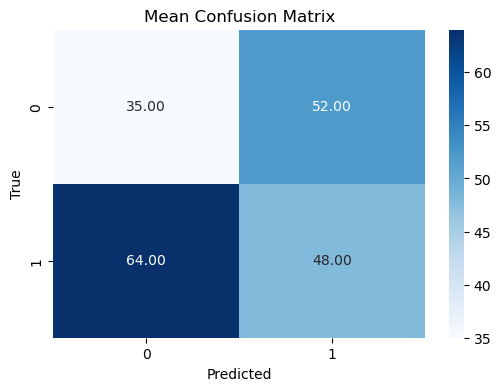

In [19]:
# Create a heatmap of the mean confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(mean_confusion_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Mean Confusion Matrix')
plt.show()